In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("World Happiness Report 2024.csv")

# Show the first few rows of the dataset
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [35]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Basic statistics for numerical columns
print(df.describe())

Country                         0
Regional indicator              0
Happiness Score                 0
upperwhisker                    0
lowerwhisker                    0
GDP Per capita                  3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64
0
       Happiness Score  upperwhisker  lowerwhisker  GDP Per capita  \
count       143.000000    143.000000    143.000000      140.000000   
mean          5.527580      5.641175      5.413972        1.378807   
std           1.170717      1.155008      1.187133        0.425098   
min           1.721000      1.775000      1.667000        0.000000   
25%           4.726000      4.845500      4.606000        1.077750   
50%           5.785000      5.895000      5.674000        1.431500   
75%           6.416000      6.507500      6.319000        1.741500   
max           7.7

In [36]:
df = df.dropna()

In [37]:
df.rename(columns={'Country name': 'Country', 'Ladder score':'Happiness Score', 'Log GDP per capita': 'GDP Per capita'},  inplace=True)

C:\Users\Dumbs\AppData\Local\Temp\ipykernel_6044\991510041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Country name': 'Country', 'Ladder score':'Happiness Score', 'Log GDP per capita': 'GDP Per capita'},  inplace=True)


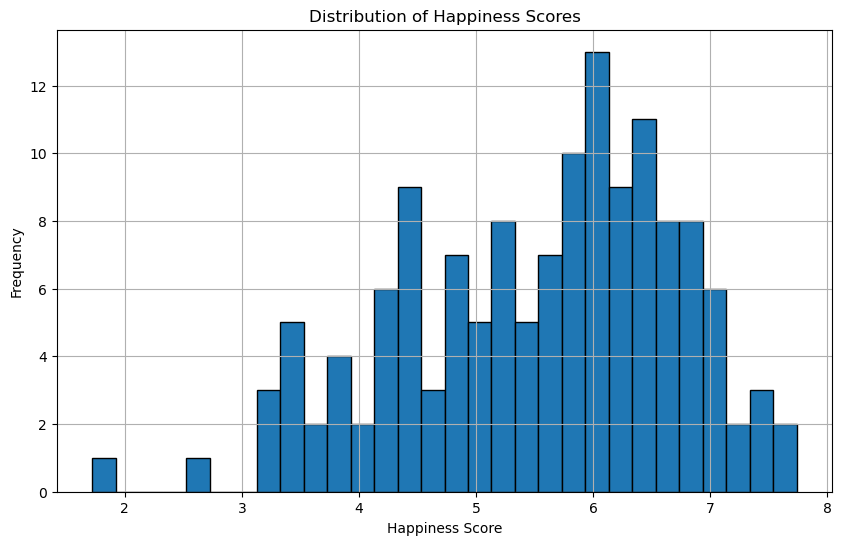

In [38]:
import matplotlib.pyplot as plt

# Plotting the distribution of happiness scores
plt.figure(figsize=(10, 6))
df['Happiness Score'].hist(bins=30, edgecolor='black')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

In [39]:
# Select only numeric columns for analysis
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Check the columns
print(df_numeric.columns)

Index(['Happiness Score', 'upperwhisker', 'lowerwhisker', 'GDP Per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')


In [40]:
correlation = df_numeric.corr()
print(correlation['Happiness Score'])

Happiness Score                 1.000000
upperwhisker                    0.999700
lowerwhisker                    0.999718
GDP Per capita                  0.768504
Social support                  0.813542
Healthy life expectancy         0.759659
Freedom to make life choices    0.644451
Generosity                      0.130038
Perceptions of corruption       0.451829
Dystopia + residual             0.533542
Name: Happiness Score, dtype: float64


In [41]:
top_10 = df.nlargest(10, 'Happiness Score')
bottom_10 = df.nsmallest(10, 'Happiness Score')

print("Top 10 Countries by Happiness Score:")
print(top_10[['Country', 'Happiness Score']])

print("\nBottom 10 Countries by Happiness Score:")
print(bottom_10[['Country', 'Happiness Score']])

Top 10 Countries by Happiness Score:
       Country  Happiness Score
0      Finland            7.741
1      Denmark            7.583
2      Iceland            7.525
3       Sweden            7.344
4       Israel            7.341
5  Netherlands            7.319
6       Norway            7.302
7   Luxembourg            7.122
8  Switzerland            7.060
9    Australia            7.057

Bottom 10 Countries by Happiness Score:
              Country  Happiness Score
142       Afghanistan            1.721
141           Lebanon            2.707
140           Lesotho            3.186
139      Sierra Leone            3.245
138  Congo (Kinshasa)            3.295
137          Zimbabwe            3.341
136          Botswana            3.383
135            Malawi            3.421
133            Zambia            3.502
134          Eswatini            3.502


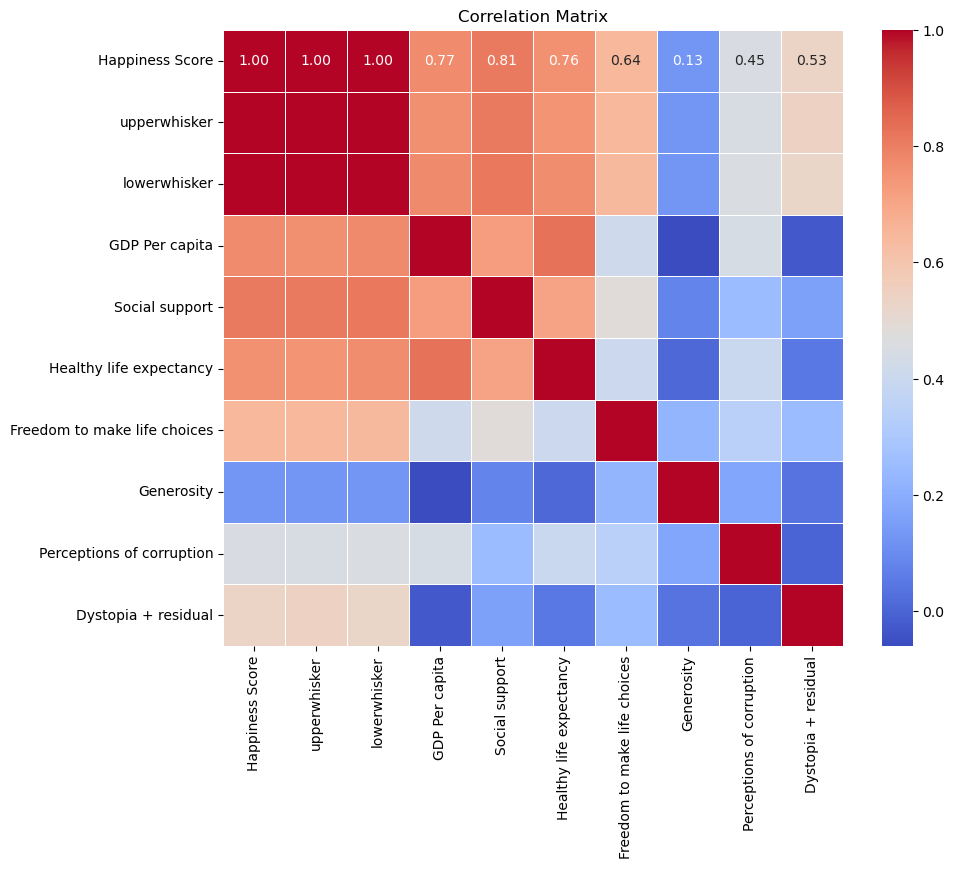

In [42]:
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

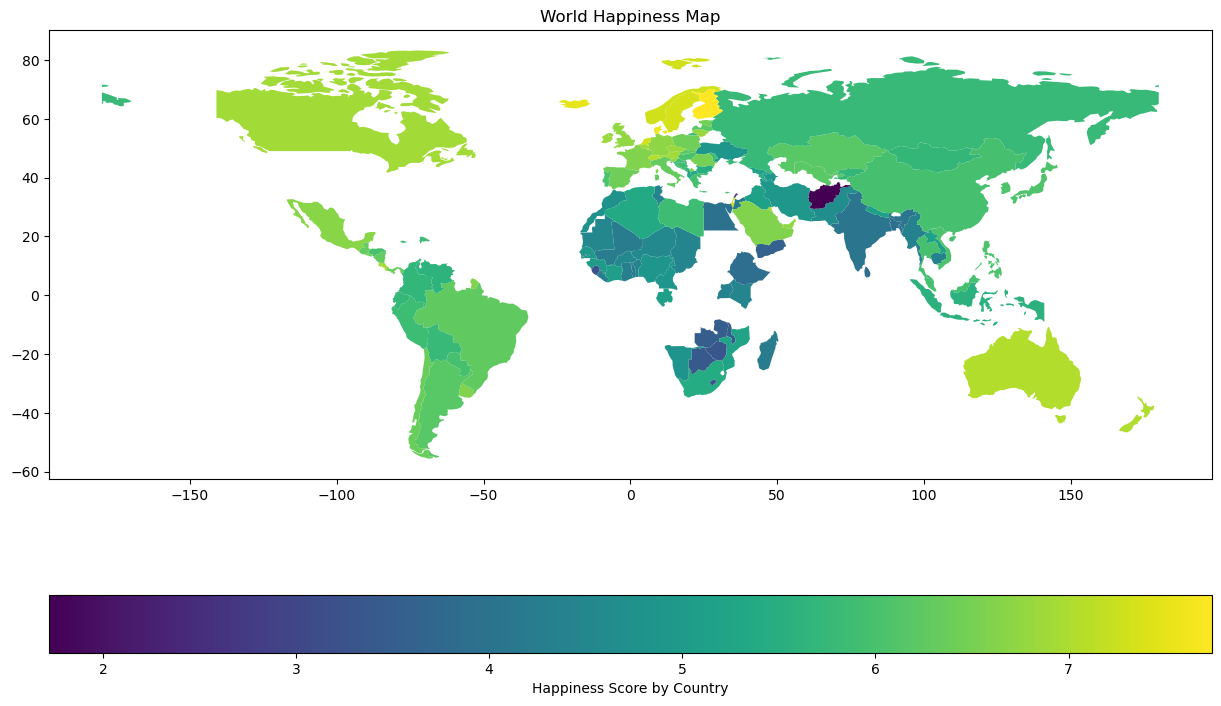

In [43]:
import geopandas as gpd

# Path to the downloaded shapefile
shapefile_path = 'ne_110m_admin_0_countries.shp'

# Load the world map
world = gpd.read_file(shapefile_path)

#print(world.columns)

# Merge world map with happiness data
merged = world.set_index('ADMIN').join(df.set_index('Country'))

# Plot the world map with happiness score
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Happiness Score', ax=ax, legend=True,
           legend_kwds={'label': "Happiness Score by Country",
                        'orientation': "horizontal"})
plt.title("World Happiness Map")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dumbs\AppData\Local\Temp\ipykernel_6044\3175993863.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(features)


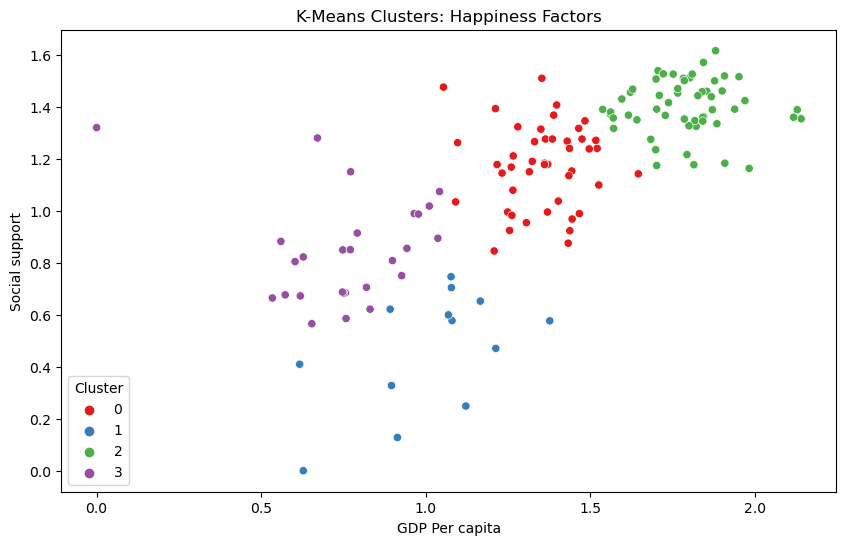

In [44]:
from sklearn.cluster import KMeans

# Select features for clustering (e.g., GDP per Capita, Social Support)
features = df[['GDP Per capita', 'Social support', 'Healthy life expectancy']].dropna()

# Fit the K-Means model
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(features)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP Per capita', y='Social support', hue='Cluster', data=df, palette='Set1')
plt.title("K-Means Clusters: Happiness Factors")
plt.show()

In [47]:
print(df.columns)

Index(['Country', 'Regional indicator', 'Happiness Score', 'upperwhisker',
       'lowerwhisker', 'GDP Per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual', 'Cluster'],
      dtype='object')


In [49]:
from sklearn.linear_model import LinearRegression

# Define independent and dependent variables
X = df[['GDP Per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']]
y = df['Happiness Score']

# Create a regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Model Coefficients:", model.coef_)

Model Coefficients: [0.58706571 1.32213023 1.4826595  2.05120208 0.7747302 ]


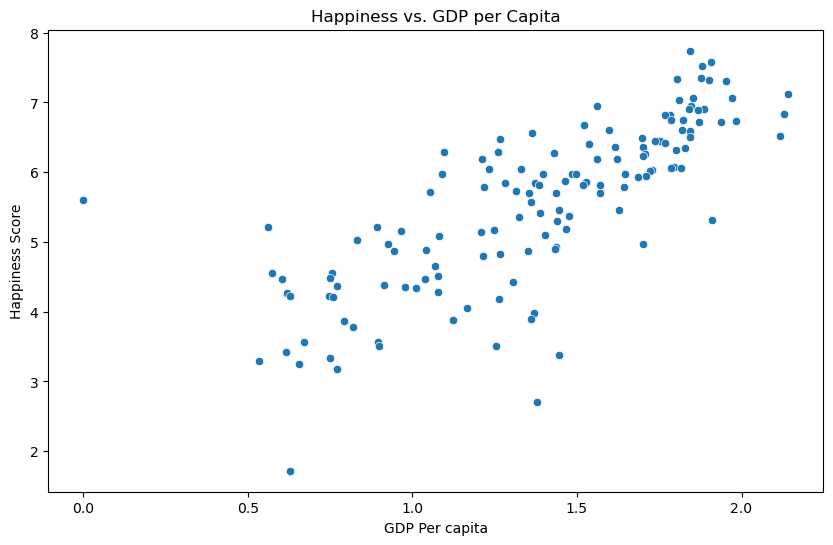

In [51]:
# Comparing happiness vs. GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP Per capita', y='Happiness Score', data=df)
plt.title("Happiness vs. GDP per Capita")
plt.show()